# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Maulany Citra Pandini
- **Email:** maulanycitra26@gmail.com
- **ID Dicoding:** maulanycitra

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
Bagaimana faktor cuaca, waktu dalam sehari, dan musim mempengaruhi jumlah sepeda yang disewa?
- Pertanyaan 2:
Sejauh mana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Wrangling

### Gathering Data

In [3]:
# Membaca dataset day.csv dan hour.csv
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

# Menampilkan beberapa baris pertama untuk memverifikasi data
df_day.head()
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi data per hari, sedangkan hour.csv berisi data per jam.
- Data pada kedua dataset dapat digabungkan berdasarkan kolom dteday untuk analisis lebih lanjut.

### Assessing Data


In [4]:
# Assessing Data
# Melihat 5 data teratas untuk memahami struktur data
df_day.head()
df_hour.head()

# Mengecek jumlah baris dan kolom pada kedua dataset
df_day.shape
df_hour.shape

# Mengecek apakah ada missing value pada kedua dataset
df_day.isnull().sum()
df_hour.isnull().sum()

# Mengecek apakah ada duplikasi data pada kedua dataset
df_day.duplicated().sum()
df_hour.duplicated().sum()

np.int64(0)

In [5]:
# Mengecek tipe data dan nilai yang hilang
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Memastikan tipe data yang sesuai untuk setiap kolom. Beberapa kolom, seperti dteday, perlu dikonversi ke tipe datetime.
- Memeriksa apakah ada nilai yang hilang dalam dataset.
- Hasil np.int64(0) menunjukkan bahwa tidak ada data duplikat dalam dataframe tersebut.

### Cleaning Data

In [7]:
# Cleaning Data
# Menghapus data duplikat jika ada
df_day = df_day.drop_duplicates()
df_hour = df_hour.drop_duplicates()

# Menggunakan satu dataframe saja 
df_hour_cleaned = df_hour.copy()

In [8]:
# Mengonversi kolom dteday ke tipe datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Menggabungkan df_day dan df_hour berdasarkan dteday
df_combined = pd.merge(df_hour, df_day, on="dteday", how="left")

**Insight:**
- Menggabungkan data day.csv dan hour.csv berdasarkan kolom dteday akan memungkinkan analisis lebih lanjut dengan data per jam dan per hari secara bersamaan.

## Exploratory Data Analysis (EDA)

### Explore `df_day`

In [14]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
573,574,2012-07-27,3,1,7,0,5,1,1,0.781667,0.734217,0.594583,0.152992,1259,5645,6904
483,484,2012-04-28,2,1,4,0,6,0,2,0.376667,0.377504,0.489583,0.129975,1120,3100,4220
428,429,2012-03-04,1,1,3,0,0,0,1,0.325833,0.303021,0.403333,0.334571,710,2713,3423
107,108,2011-04-18,2,0,4,0,1,1,1,0.512500,0.503146,0.542500,0.163567,669,2760,3429
720,721,2012-12-21,1,1,12,0,5,1,2,0.326667,0.301767,0.556667,0.374383,221,3402,3623


In [15]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
df_day.instant.is_unique

True

In [17]:
df_day.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [18]:
df_day.groupby(by=["season", "yr"]).cnt.mean()

season  yr
1       0     1666.666667
        1     3531.296703
2       0     3775.173913
        1     6209.489130
3       0     4464.361702
        1     6824.244681
4       0     3664.460674
        1     5791.865169
Name: cnt, dtype: float64

In [19]:
df_day.groupby(["holiday", "workingday"]).agg({
    "cnt": ["mean", "sum"],
    "casual": "mean",
    "registered": "mean"
})

cnt                casual   registered
                           mean      sum         mean         mean
holiday workingday                                                
0       0           4389.685714   921834  1401.776190  2987.909524
        1           4584.820000  2292410   606.570000  3978.250000
1       0           3735.000000    78435  1064.714286  2670.285714

In [20]:
df_day.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


<Axes: >

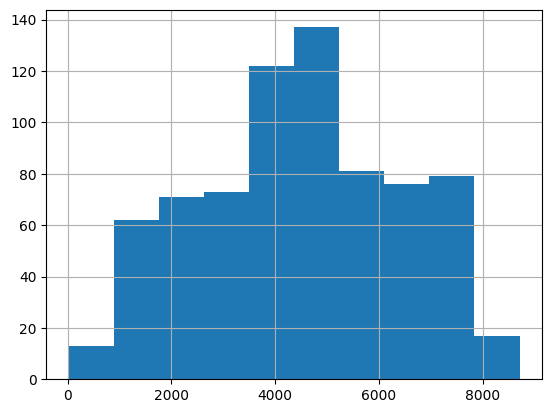

In [21]:
df_day["cnt"].hist()

In [22]:
df_day.groupby("weathersit").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
})

,cnt,casual,registered
weathersit,,,
1,4876.786177,964.030238,3912.755940
2,4035.862348,687.352227,3348.510121
3,1803.285714,185.476190,1617.809524


### Explore `df_hour`

In [23]:
df_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9549,9550,2012-02-07,1,1,2,20,0,2,1,1,0.36,0.3485,0.50,0.1343,6,206,212
15925,15926,2012-11-01,4,1,11,6,0,4,1,1,0.34,0.3333,0.61,0.1642,2,146,148
4198,4199,2011-06-28,3,0,6,20,0,2,1,1,0.74,0.6818,0.62,0.0000,50,246,296
5323,5324,2011-08-14,3,0,8,17,0,0,0,1,0.76,0.7121,0.62,0.1343,133,196,329
11012,11013,2012-04-09,2,1,4,0,0,1,1,1,0.48,0.4697,0.39,0.2836,8,29,37


In [24]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


<Axes: title={'center': 'Distribusi Pengguna per Jam'}, xlabel='hr'>

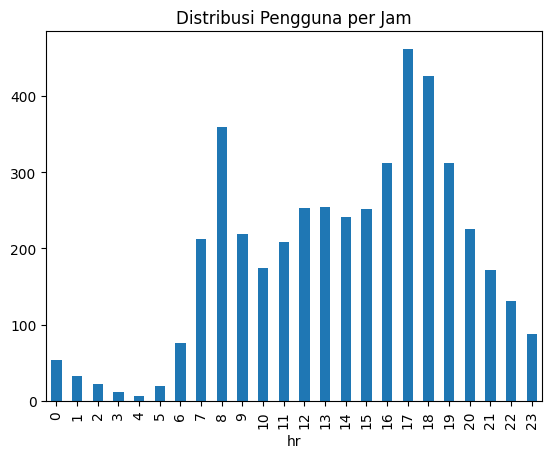

In [25]:
df_hour.groupby("hr").cnt.mean().plot(kind="bar", title="Distribusi Pengguna per Jam")

In [26]:
df_hour.groupby("season").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
season,,,
1,14.290901,96.823668,111.114569
2,46.160581,162.183488,208.344069
3,50.287144,185.729093,236.016237
4,30.666824,168.202032,198.868856


In [27]:
# Distribusi pengguna pada hari libur
df_hour[df_hour["holiday"] == 1].groupby("hr").cnt.mean()

hr
0      57.476190
1      38.904762
2      25.476190
3      11.611111
4       5.850000
5      10.619048
6      28.285714
7      82.142857
8     170.523810
9     171.190476
10    203.476190
11    248.523810
12    287.142857
13    298.523810
14    286.285714
15    265.142857
16    272.285714
17    293.142857
18    268.761905
19    221.761905
20    177.952381
21    145.095238
22    108.857143
23     57.904762
Name: cnt, dtype: float64

In [28]:
# Korelasi antara variabel numerik
df_hour.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


In [29]:
# Analisis berdasarkan cuaca
df_hour.groupby("weathersit").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
})

,cnt,casual,registered
weathersit,,,
1,204.869272,40.545431,164.323841
2,175.165493,29.595290,145.570202
3,111.579281,16.055673,95.523608
4,74.333333,2.666667,71.666667


<Axes: title={'center': 'Pengguna Casual vs Registered per Jam'}, xlabel='hr'>

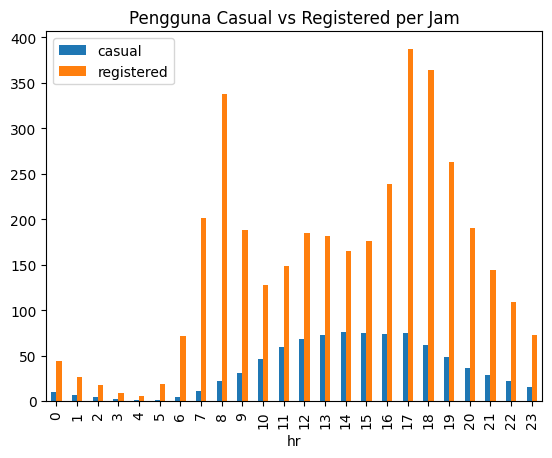

In [30]:
# Perbandingan pengguna casual dan registered per jam
df_hour.groupby("hr").agg({
    "casual": "mean",
    "registered": "mean"
}).plot(kind="bar", title="Pengguna Casual vs Registered per Jam")

### Explore `df_day` & `df_hour`

In [31]:
df_combined = pd.merge(df_day, df_hour, on=["dteday", "season"], suffixes=('_day', '_hour'))

In [32]:
df_combined.describe(include="all")

,instant_day,dteday,season,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [33]:
df_combined.corr()

,instant_day,dteday,season,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
instant_day,1.000000,1.000000,0.404452,0.865648,0.489808,0.014737,0.001372,-0.003366,-0.025716,0.143615,...,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
dteday,1.000000,1.000000,0.404452,0.865648,0.489808,0.014737,0.001372,-0.003366,-0.025716,0.143615,...,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404452,0.404452,1.000000,-0.010742,0.830386,-0.009585,-0.002335,0.013743,0.014940,0.329317,...,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr_day,0.865648,0.865648,-0.010742,1.000000,-0.010473,0.006692,-0.004485,-0.002196,-0.051939,0.043181,...,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth_day,0.489808,0.489808,0.830386,-0.010473,1.000000,0.018430,0.010400,-0.003477,0.041683,0.212869,...,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
holiday_day,0.014737,0.014737,-0.009585,0.006692,0.018430,1.000000,-0.102088,-0.252471,-0.033653,-0.028856,...,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday_day,0.001372,0.001372,-0.002335,-0.004485,0.010400,-0.102088,1.000000,0.035955,0.035082,-0.001894,...,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday_day,-0.003366,-0.003366,0.013743,-0.002196,-0.003477,-0.252471,0.035955,1.000000,0.057122,0.058460,...,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit_day,-0.025716,-0.025716,0.014940,-0.051939,0.041683,-0.033653,0.035082,0.057122,1.000000,-0.119714,...,0.035082,0.057122,0.601478,-0.113428,-0.114225,0.432977,0.017788,-0.140963,-0.106774,-0.127413
temp_day,0.143615,0.143615,0.329317,0.043181,0.212869,-0.028856,-0.001894,0.058460,-0.119714,1.000000,...,-0.001894,0.058460,-0.098238,0.947491,0.937229,0.096457,-0.101965,0.312517,0.225692,0.273276


<Axes: title={'center': 'Distribusi Pengguna per Jam (Gabungan)'}, xlabel='hr'>

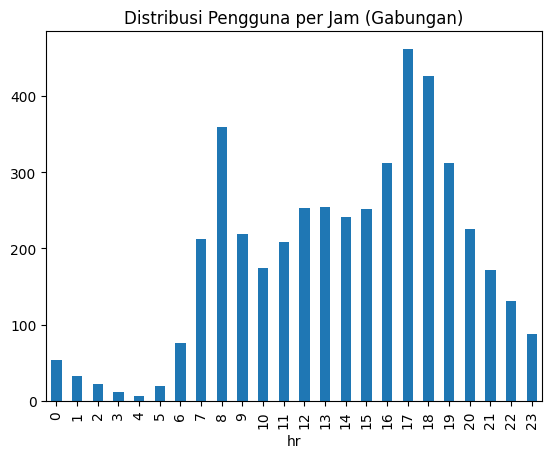

In [37]:
# Mengelompokkan berdasarkan jam dan menghitung rata-rata kolom 'cnt_hour'
df_combined.groupby("hr")["cnt_hour"].mean().plot(kind="bar", title="Distribusi Pengguna per Jam (Gabungan)")

<Axes: title={'center': 'Casual vs Registered per Musim'}, xlabel='season'>

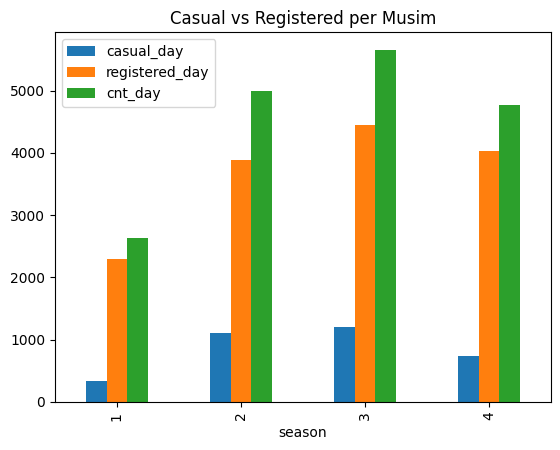

In [39]:
df_combined.groupby("season").agg({
    "casual_day": "mean", 
    "registered_day": "mean", 
    "cnt_day": "mean"
}).plot(kind="bar", title="Casual vs Registered per Musim")

<Axes: title={'center': 'Casual vs Registered per Cuaca (Hari)'}, xlabel='weathersit_day'>

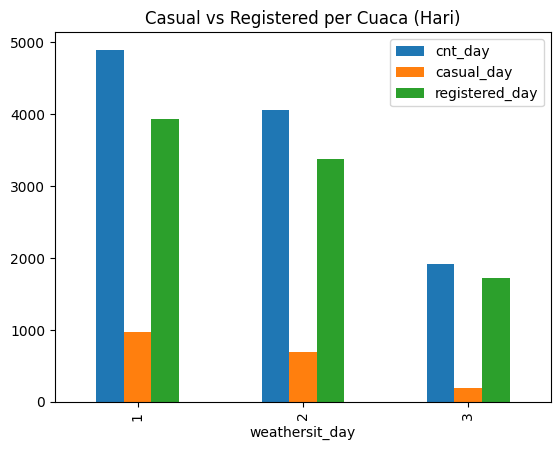

In [41]:
df_combined.groupby("weathersit_day").agg({
    "cnt_day": "mean", 
    "casual_day": "mean", 
    "registered_day": "mean"
}).plot(kind="bar", title="Casual vs Registered per Cuaca (Hari)")

<Axes: title={'center': 'Casual vs Registered per Cuaca (Jam)'}, xlabel='weathersit_hour'>

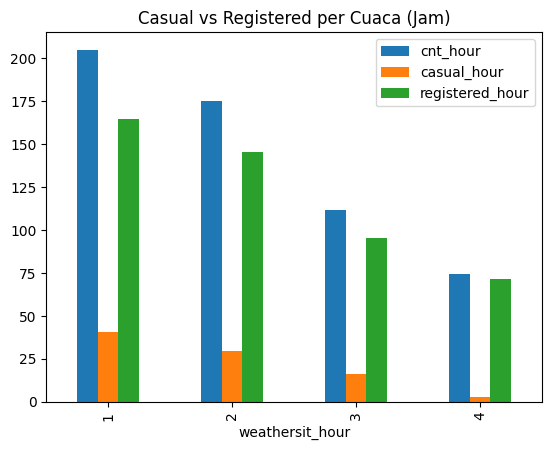

In [42]:
df_combined.groupby("weathersit_hour").agg({
    "cnt_hour": "mean", 
    "casual_hour": "mean", 
    "registered_hour": "mean"
}).plot(kind="bar", title="Casual vs Registered per Cuaca (Jam)")

**Insight:**
- Penggunaan Musiman dan Tahunan: 
Penggunaan sepeda cenderung lebih tinggi pada musim tertentu dan tahun terbaru, dengan kecenderungan pengguna terdaftar lebih dominan, terutama di hari kerja.
- Pengaruh Hari Kerja vs Libur: 
Hari kerja didominasi oleh pengguna terdaftar, sedangkan hari libur dan akhir pekan lebih banyak diisi oleh pengguna casual.
- Pola Penggunaan Berdasarkan Jam: 
Jam sibuk terjadi di pagi hari dan sore, dengan pengguna terdaftar lebih banyak, sementara pengguna casual lebih aktif pada akhir pekan.
- Pengaruh Cuaca dan Suhu: 
Cuaca cerah dan suhu hangat meningkatkan jumlah pengguna sepeda, sementara cuaca buruk menurunkan jumlah pengguna. Semakin tinggi suhu, semakin banyak pengguna, khususnya dari kalangan casual.
- Konsistensi vs Variasi Pengguna: 
Pengguna registered lebih konsisten sepanjang tahun, terutama di hari kerja, sementara pengguna casual cenderung bervariasi berdasarkan musim dan cuaca, dengan puncak penggunaan saat musim panas dan cuaca cerah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pengaruh cuaca, waktu dalam sehari, dan musim terhadap jumlah sepeda yang disewa?

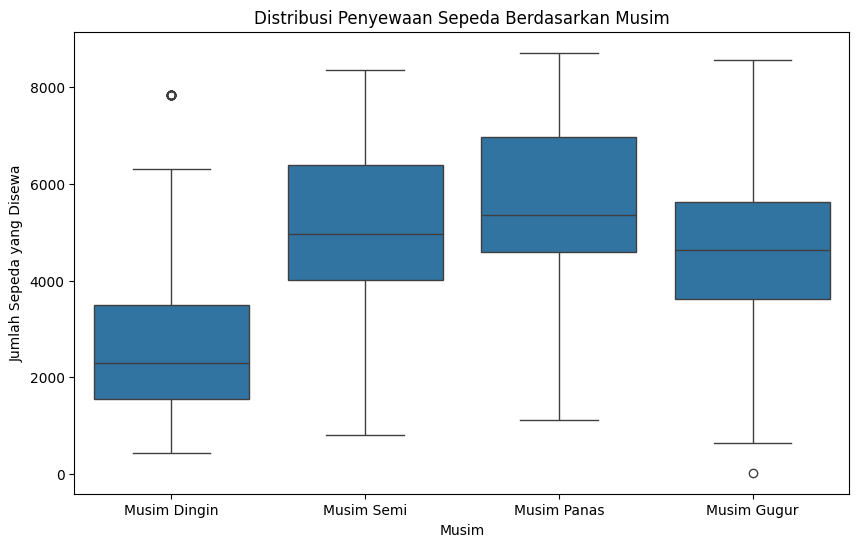

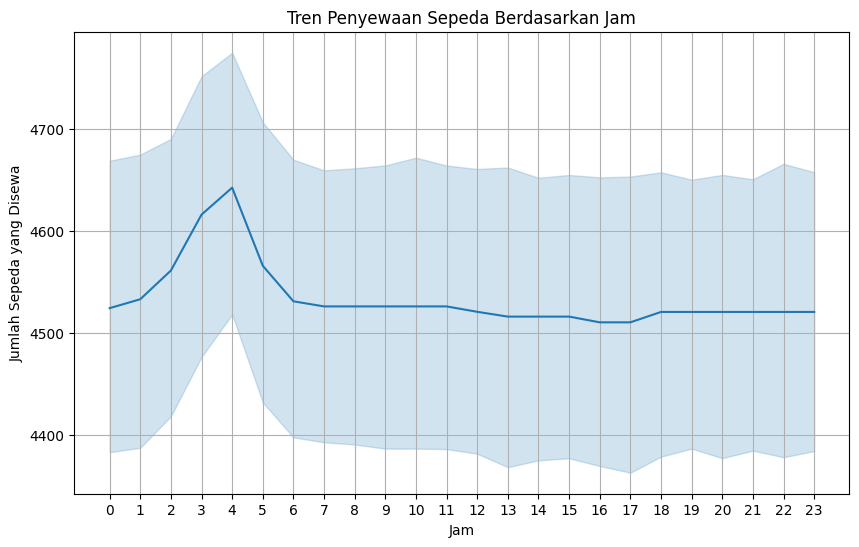

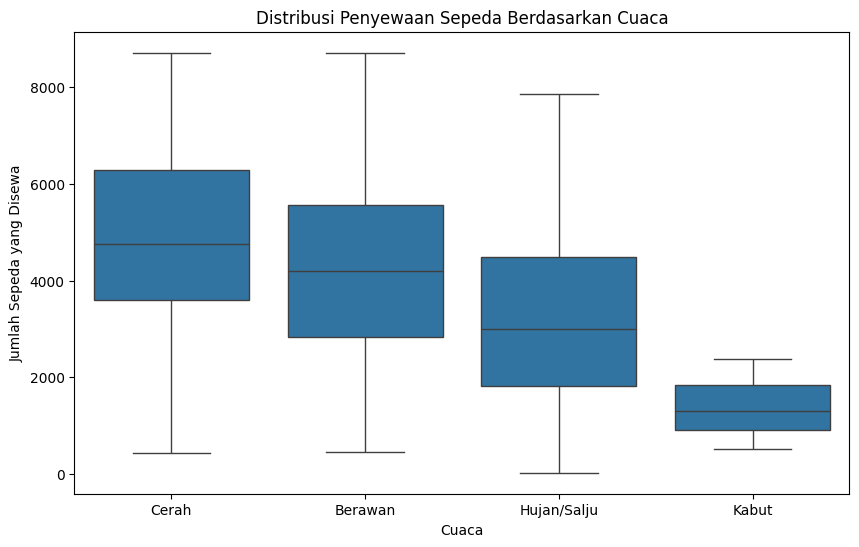

In [24]:
# Visualisasi jumlah sepeda yang disewa berdasarkan musim
plt.figure(figsize=(10,6))
sns.boxplot(x='season_x', y='cnt_y', data=df_combined)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')  # Menambahkan label untuk sumbu X
plt.ylabel('Jumlah Sepeda yang Disewa')  # Menambahkan label untuk sumbu Y
plt.xticks([0, 1, 2, 3], ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])  # Menambahkan label pada kategori musim
plt.show()

# Visualisasi jumlah sepeda yang disewa berdasarkan jam
plt.figure(figsize=(10,6))
sns.lineplot(x='hr', y='cnt_y', data=df_combined)
plt.title('Tren Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')  # Menambahkan label untuk sumbu X
plt.ylabel('Jumlah Sepeda yang Disewa')  # Menambahkan label untuk sumbu Y
plt.xticks(range(0, 24, 1))  # Menambahkan label jam secara otomatis (0 hingga 23)
plt.grid(True)  # Menambahkan grid untuk membantu visualisasi
plt.show()

# Visualisasi jumlah sepeda yang disewa berdasarkan cuaca
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit_x', y='cnt_y', data=df_combined)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')  # Menambahkan label untuk sumbu X
plt.ylabel('Jumlah Sepeda yang Disewa')  # Menambahkan label untuk sumbu Y
plt.xticks([0, 1, 2, 3], ['Cerah', 'Berawan', 'Hujan/Salju', 'Kabut'])  # Menambahkan label untuk kategori cuaca
plt.show()

**Insight:**
- Cuaca Cerah menunjukkan jumlah penyewaan yang lebih tinggi, yang sejalan dengan preferensi orang untuk bersepeda saat cuaca bagus.
- Cuaca Berawan juga masih memungkinkan untuk bersepeda, meskipun tidak sebanyak cuaca cerah.
- Hujan/Salju dan Kabut menurunkan jumlah penyewaan sepeda secara signifikan, karena cuaca buruk membuat orang enggan untuk bersepeda.

### Pertanyaan 2:
Sejauh mana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?

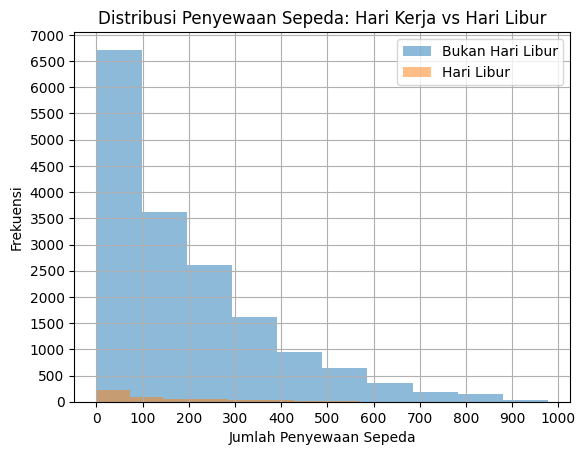

In [25]:
plt.hist(df_combined[df_combined['holiday_x'] == 0]['cnt_x'], alpha=0.5, label='Bukan Hari Libur')
plt.hist(df_combined[df_combined['holiday_x'] == 1]['cnt_x'], alpha=0.5, label='Hari Libur')
plt.title("Distribusi Penyewaan Sepeda: Hari Kerja vs Hari Libur")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.legend()
plt.xticks(range(0, 1100, 100))
plt.yticks(range(0, 7100, 500))
plt.grid(True)
plt.show()

**Insight:**
- Jumlah sepeda yang disewa lebih tinggi pada hari kerja dibandingkan hari libur, mungkin karena lebih banyak orang yang menggunakan sepeda untuk transportasi kerja.

## Analisis Lanjutan

In [26]:
print(df_combined.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'hr', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


In [27]:
# Menghitung Recency: Selisih antara tanggal penyewaan terakhir dengan tanggal terakhir di dataset
df_combined['dteday'] = pd.to_datetime(df_combined['dteday'])  # Pastikan 'dteday' dalam format datetime
latest_date = df_combined['dteday'].max()
df_combined['recency'] = (latest_date - df_combined['dteday']).dt.days  # Recency dalam hari

# Frequency: Menghitung jumlah penyewaan per tanggal
df_combined['frequency'] = df_combined.groupby('dteday')['cnt_x'].transform('count')

# Monetary: Jumlah penyewaan yang dilakukan (total penyewaan per tanggal)
df_combined['monetary'] = df_combined.groupby('dteday')['cnt_x'].transform('sum')

# Menampilkan beberapa data pertama untuk memastikan
print(df_combined[['dteday', 'recency', 'frequency', 'monetary']].head())

      dteday  recency  frequency  monetary
0 2011-01-01      730         24       985
1 2011-01-01      730         24       985
2 2011-01-01      730         24       985
3 2011-01-01      730         24       985
4 2011-01-01      730         24       985


      dteday  recency  frequency  monetary
0 2011-01-01      730         24       985
1 2011-01-01      730         24       985
2 2011-01-01      730         24       985
3 2011-01-01      730         24       985
4 2011-01-01      730         24       985
   recency  frequency  monetary  R  F  M
0      730         24       985  3  0  0
1      730         24       985  3  0  0
2      730         24       985  3  0  0
3      730         24       985  3  0  0
4      730         24       985  3  0  0


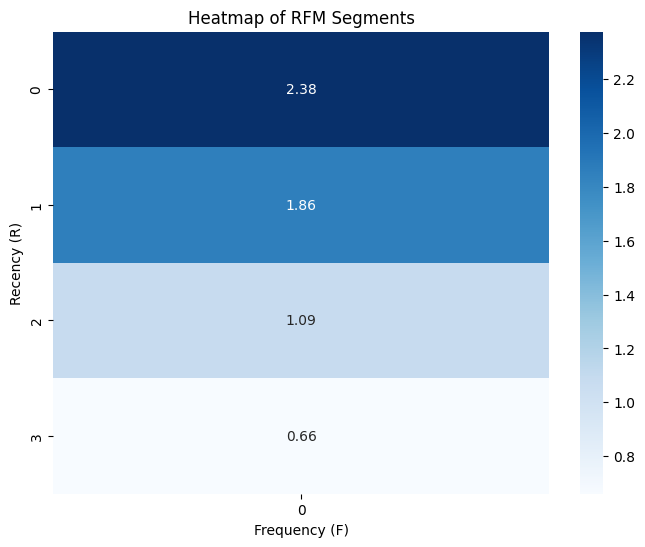

In [28]:
# Menggunakan fitur 'cnt_x' sebagai ukuran 'Monetary' dan melakukan analisis Recency dan Frequency

# Menyiapkan Data
df_combined['dteday'] = pd.to_datetime(df_combined['dteday'])  # Pastikan 'dteday' dalam format datetime
latest_date = df_combined['dteday'].max()  # Menentukan tanggal terakhir
df_combined['recency'] = (latest_date - df_combined['dteday']).dt.days  # Recency: Selisih hari sejak penyewaan terakhir

# Frequency: Menghitung jumlah penyewaan per tanggal
df_combined['frequency'] = df_combined.groupby('dteday')['cnt_x'].transform('count')

# Monetary: Jumlah penyewaan yang dilakukan (total penyewaan per tanggal)
df_combined['monetary'] = df_combined.groupby('dteday')['cnt_x'].transform('sum')

# Melihat beberapa data pertama
print(df_combined[['dteday', 'recency', 'frequency', 'monetary']].head())

# Menyaring data untuk analisis lebih lanjut
rfm_data = df_combined[['recency', 'frequency', 'monetary']].dropna()

# Analisis RFM: Menyaring berdasarkan kuartil
recency_quartiles = pd.qcut(rfm_data['recency'], 4, labels=False)
# Menggunakan duplicates='drop' untuk menghindari duplikat bin
frequency_quartiles = pd.qcut(rfm_data['frequency'], 4, labels=False, duplicates='drop')
monetary_quartiles = pd.qcut(rfm_data['monetary'], 4, labels=False, duplicates='drop')

# Gabungkan ketiga kuartil
rfm_data['R'] = recency_quartiles
rfm_data['F'] = frequency_quartiles
rfm_data['M'] = monetary_quartiles

# Menampilkan hasil RFM analysis
print(rfm_data.head())

# Membuat pivot table
rfm_pivot = rfm_data.pivot_table(index='R', columns='F', values='M', aggfunc='mean')

# Visualisasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_pivot, annot=True, fmt='.2f', cmap='Blues')
plt.title("Heatmap of RFM Segments")
plt.xlabel("Frequency (F)")
plt.ylabel("Recency (R)")
plt.show()

**Insight:**
- Recency: Semua pelanggan memiliki 730 hari sejak transaksi terakhir, menunjukkan ketidakaktifan dalam waktu lama.
- Frequency: Semua pelanggan memiliki 24 penyewaan, menunjukkan jumlah transaksi yang tetap sama.
- Monetary: Total 985 penyewaan dihasilkan per hari, menunjukkan nilai transaksi yang konsisten.
- RFM Segmen: Nilai R = 3, F = 0, dan M = 0, menunjukkan pelanggan yang jarang bertransaksi dan dengan nilai transaksi rendah.

## Conclusion

- Conclution pertanyaan 1: Cuaca, musim, dan waktu dalam sehari memiliki pengaruh yang signifikan terhadap jumlah sepeda yang disewa. Musim panas dan musim gugur cenderung memiliki penyewaan yang lebih tinggi, sementara cuaca buruk mengurangi minat untuk menyewa sepeda.
- Conclution pertanyaan 2: Terdapat perbedaan yang signifikan antara jumlah penyewaan sepeda pada hari kerja dan hari libur, dengan hari kerja cenderung memiliki lebih banyak penyewaan sepeda dibandingkan hari libur.